## K-Means Clustering from Scratch (Naive Python Implementation)

PySpark implementation at: https://github.com/GitAashishG/DM-A3-KMeans 

In [1]:
!which python3

/opt/homebrew/Caskroom/miniforge/base/bin/python3


In [10]:
#only import necessary
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#read the data points
points = np.loadtxt('data.txt', delimiter='\t')

#shuffle the data points
points = np.random.permutation(points)

#read the initial centroids
centroids = np.loadtxt('centroid.txt', delimiter='\t')


In [4]:
#To start, we attached the closest centroid to each data point.
members = {}        #This will hold membership of each data point
distance = []       #this will hold the distance of each data point to their closest centroid
for point in points:
    #calculate the distance of each point to each centroid
    distances = [np.linalg.norm(point - centroid) for centroid in centroids]

    #find the index of the closest centroid
    closest_centroid = distances.index(min(distances))
    
    #assign the point to the closest centroid    
    members[closest_centroid] = members[closest_centroid] + [point] if closest_centroid in members else [point]

    #add distance for cost mesurement
    distance.append(distances[closest_centroid])  
    
#calculate the cost of the current assignment:
cost = np.square(distances).sum()
print(f'cost: {cost}')

cost: 83.0305


In [5]:
print(np.sqrt(4))

2.0


In [6]:
#Quickly checking membership of each centroid
for i in range(10):
    if i in members:
        print(i, len(members[i]))

0 105
1 170
2 39
3 138
5 24
6 63
7 7
8 30
9 424


In [7]:
MAX_ITER = 20       #maximum number of iterations   
cost_list = []      #list to hold the cost of each iteration
for it in range(MAX_ITER):
    
    new_centroids = []
    for i in range(10):
        if i in members:
            new_centroid = np.mean(members[i], axis=0)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(centroids[i])
    if np.array_equal(new_centroids, centroids):
        print('Converged at iteration #%d' % (it + 1))
        break
    centroids = new_centroids

    
    members = {}        #reset membership
    iterDistance = []   #reset distance
    for point in points:
        #calculate the distance of each point to each centroid
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        # print(distances)
        #find the index of the closest centroid
        closest_centroid = distances.index(min(distances))        
        
        #assign the point to the closest centroid
        members[closest_centroid] = members[closest_centroid] + [point] if closest_centroid in members else [point]
        
        #add the distance to the list
        iterDistance.append(distances[closest_centroid])

    localcost = np.square(iterDistance).sum()
    cost_list.append(localcost)
    
    

Converged at iteration #13


[Text(0.5, 1.0, 'Cost vs Iteration')]

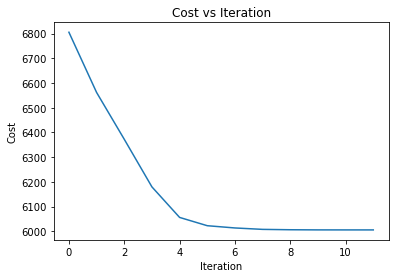

In [8]:
#plot the cost vs iteration

import seaborn as sns
ax = sns.lineplot(x = range(len(cost_list)), y = cost_list)
ax.set(xlabel='Iteration', ylabel='Cost')
ax.set(title='Cost vs Iteration')

    

In [9]:
#Print the final cost
print(f'Final cost: {cost_list[-1]}')

Final cost: 6005.635143611984
